In [1]:
# Required package for running SQL queries: ipython-sql
# If not installed run: !pip install ipython-sql

# Load sql extention
%load_ext sql

import pandas as pd
import sqlite3

In [2]:
# Load cleaned data
df = pd.read_csv('./unwto_cleaned_long.csv')

# Connect to SQLIte database
conn = sqlite3.connect('tourism.db')


# Save dataframe to SQL table
df.to_sql('tourism_data', conn, if_exists='replace', index=False)

# Load sql extension with this connection
%sql sqlite:///tourism.db

In [3]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

#### Data Exploration

In [7]:
%%sql
SELECT * FROM tourism_data LIMIT 5;

 * sqlite:///tourism.db
Done.


Country,Indicator,Year,Value
ALGERIA,Number of rooms,1995,31805.0
ALGERIA,Number of bed-places,1995,63614.0
ALGERIA,Occupancy rate / bed-places,1995,33.34
ANGOLA,Number of rooms,1995,4943.0
ANGOLA,Number of bed-places,1995,6783.0


In [9]:
%%sql
SELECT COUNT(*) AS total_rows, COUNT(DISTINCT Country) AS unique_countries FROM tourism_data;


 * sqlite:///tourism.db
Done.


total_rows,unique_countries
20015,215


#### Find Total Bed-Places Over Time

In [12]:
%%sql

SELECT YEAR, SUM(Value) AS Total_Bed_Places
FROM tourism_data
WHERE Indicator = 'Number of bed-places'
GROUP BY YEAR
ORDER BY YEAR

 * sqlite:///tourism.db
Done.


Year,Total_Bed_Places
1995,15720391.0
1996,16130980.0
1997,16748724.0
1998,17912510.0
1999,18697077.0
2000,19170642.0
2001,19378054.0
2002,19885084.0
2003,20573073.0
2004,21711195.0


In [13]:
# Visualization

In [14]:
result = %sql SELECT YEAR, SUM(Value) AS Total_Bed_Places \
              FROM tourism_data \
              WHERE Indicator = 'Number of bed-places' \
              GROUP BY YEAR \
              ORDER BY YEAR

df_bed_places = result.DataFrame()

 * sqlite:///tourism.db
Done.


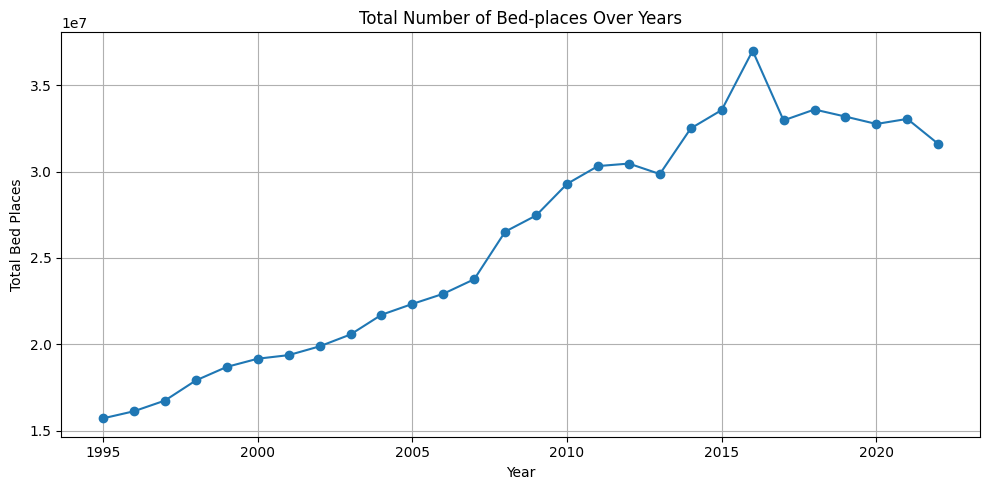

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_bed_places['Year'], df_bed_places['Total_Bed_Places'], marker='o')
plt.title('Total Number of Bed-places Over Years')
plt.xlabel('Year')
plt.ylabel('Total Bed Places')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px

fig = px.line(df_bed_places, x='Year', y='Total_Bed_Places',
              title='Total Number of Bed-places Over Years',
              labels={'Year': 'Year', 'Total_Bed_Places': 'Total Bed Places'})
fig.show()


#### Find Average Occupancy Rate Over Time

In [18]:
%%sql
SELECT Year, AVG(Value) AS Avg_Occupancy_Rate
FROM tourism_data
WHERE Indicator = 'Occupancy rate / bed-places'
GROUP BY Year
ORDER BY Year;

 * sqlite:///tourism.db
Done.


Year,Avg_Occupancy_Rate
1995,42.72636363636364
1996,44.110113636363636
1997,43.6510989010989
1998,44.32168539325843
1999,41.831
2000,42.64688172043011
2001,43.047111111111114
2002,41.93941860465116
2003,40.353658536585364
2004,42.716329113924054


In [20]:
# Visualization

In [19]:
result = %sql SELECT Year, AVG(Value) AS Avg_Occupancy_Rate \
              FROM tourism_data \
              WHERE Indicator = 'Occupancy rate / bed-places' \
              GROUP BY Year \
              ORDER BY Year;

df_occupancy = result.DataFrame()

 * sqlite:///tourism.db
Done.


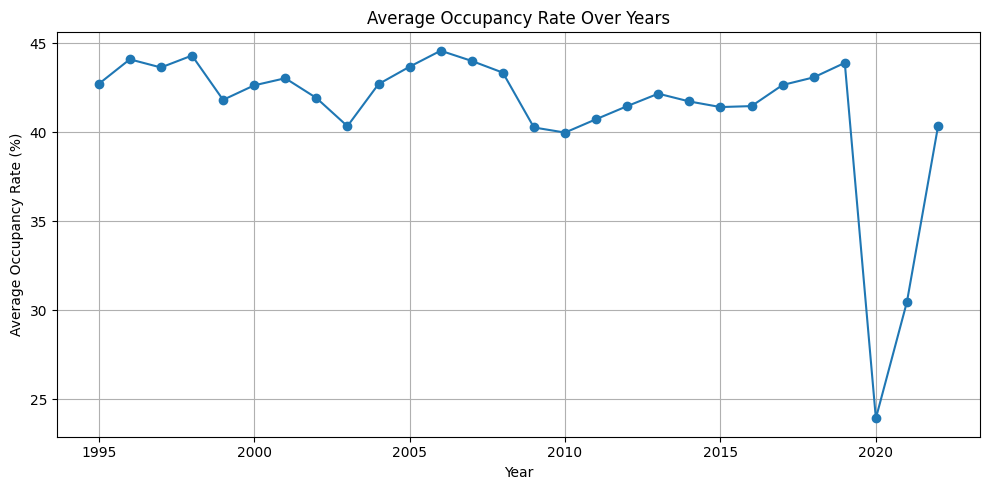

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_occupancy['Year'], df_occupancy['Avg_Occupancy_Rate'], marker='o', linestyle='-')
plt.title('Average Occupancy Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Occupancy Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
import plotly.express as px

fig = px.line(df_occupancy, x='Year', y='Avg_Occupancy_Rate',
              title='Average Occupancy Rate Over Years',
              labels={'Year': 'Year', 'Avg_Occupancy_Rate': 'Occupancy Rate (%)'})
fig.show()

#### Top 10 Countries by Bed-Places


In [23]:
%%sql
SELECT Country, Year, Value AS Bed_Places
FROM tourism_data
WHERE Indicator = 'Number of bed-places'
  AND Year = (SELECT MAX(Year) FROM tourism_data)
ORDER BY Bed_Places DESC
LIMIT 10;

 * sqlite:///tourism.db
Done.


Country,Year,Bed_Places
JAPAN,2022,4183501.0
ITALY,2022,2241988.0
CHINA,2022,2046700.0
SPAIN,2022,1992394.0
GERMANY,2022,1971314.0
MEXICO,2022,1762044.0
TÜRKIYE,2022,1724987.0
FRANCE,2022,1354728.0
INDONESIA,2022,1169006.0
GREECE,2022,880624.0


##### Visualization

In [24]:
result = %sql SELECT Country, Year, Value AS Bed_Places \
              FROM tourism_data \
              WHERE Indicator = 'Number of bed-places' \
                AND Year = (SELECT MAX(Year) FROM tourism_data) \
              ORDER BY Bed_Places DESC \
              LIMIT 10;

df_top_beds = result.DataFrame()


 * sqlite:///tourism.db
Done.


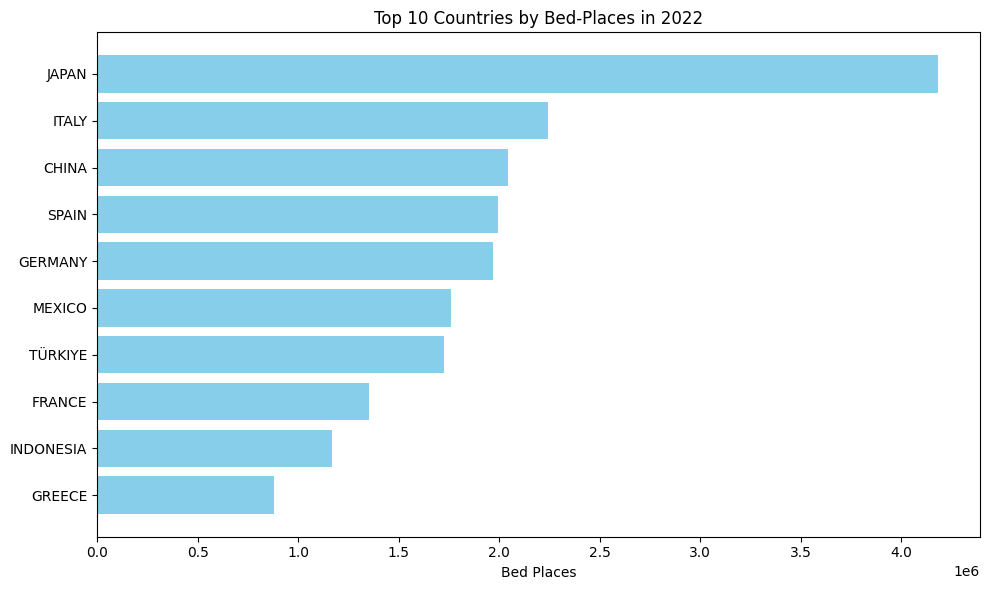

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_top_beds['Country'], df_top_beds['Bed_Places'], color='skyblue')
plt.xlabel('Bed Places')
plt.title(f"Top 10 Countries by Bed-Places in {df_top_beds['Year'][0]}")
plt.gca().invert_yaxis()  # To show the highest value at the top
plt.tight_layout()
plt.show()


In [26]:
import plotly.express as px

fig = px.bar(df_top_beds, x='Bed_Places', y='Country',
             orientation='h',
             title=f"Top 10 Countries by Bed-Places in {df_top_beds['Year'][0]}",
             labels={'Bed_Places': 'Number of Bed Places', 'Country': 'Country'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


#### Change in Bed-Places (1995 vs Most Recent Year)

In [28]:
%%sql
SELECT Country, Year, Value AS Bed_Places
FROM tourism_data
WHERE Indicator = 'Number of bed-places'
  AND Year IN (1995, (SELECT MAX(Year) FROM tourism_data))
  AND Country IN (
    SELECT Country
    FROM tourism_data
    WHERE Indicator = 'Number of bed-places'
    GROUP BY Country
    HAVING COUNT(DISTINCT Year) >= 2
  )
ORDER BY Bed_Places, Year;

 * sqlite:///tourism.db
Done.


Country,Year,Bed_Places
CENTRAL AFRICAN REPUBLIC,1995,370.0
SAO TOME AND PRINCIPE,1995,404.0
KIRIBATI,2022,535.0
DJIBOUTI,1995,545.0
MARSHALL ISLANDS,1995,658.0
CHAD,1995,688.0
COMOROS,1995,784.0
SAN MARINO,1995,1172.0
LIECHTENSTEIN,1995,1203.0
LIECHTENSTEIN,2022,1215.0


In [29]:
result = %sql SELECT Country, Year, Value AS Bed_Places \
              FROM tourism_data \
              WHERE Indicator = 'Number of bed-places' \
                AND Year IN (1995, (SELECT MAX(Year) FROM tourism_data)) \
                AND Country IN ( \
                    SELECT Country \
                    FROM tourism_data \
                    WHERE Indicator = 'Number of bed-places' \
                    GROUP BY Country \
                    HAVING COUNT(DISTINCT Year) >= 2 \
                ) \
              ORDER BY Bed_Places, Year;

df_beds_compare = result.DataFrame()


 * sqlite:///tourism.db
Done.


In [30]:
df_pivot = df_beds_compare.pivot(index='Country', columns='Year', values='Bed_Places').dropna()
df_pivot = df_pivot.sort_values(by=df_pivot.columns[-1], ascending=False).head(10)  # Top 10 by latest year


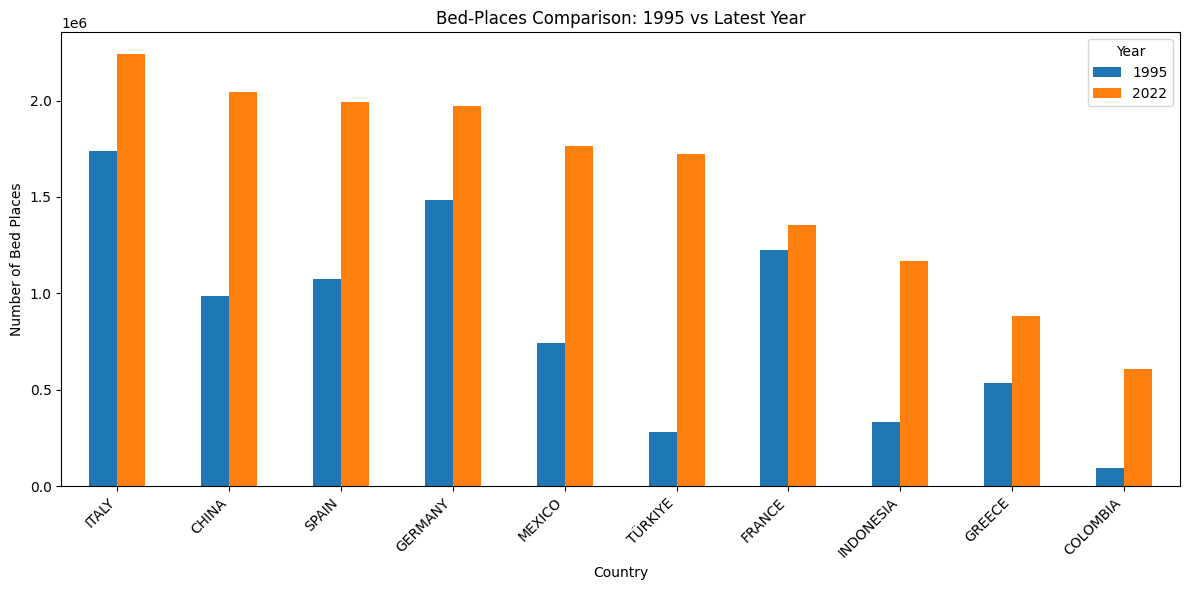

In [31]:
df_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Bed-Places Comparison: 1995 vs Latest Year')
plt.xlabel('Country')
plt.ylabel('Number of Bed Places')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [32]:
import plotly.graph_objects as go

fig = go.Figure()
years = df_pivot.columns.tolist()

fig.add_trace(go.Bar(x=df_pivot.index, y=df_pivot[years[0]],
                     name=str(years[0])))
fig.add_trace(go.Bar(x=df_pivot.index, y=df_pivot[years[1]],
                     name=str(years[1])))

fig.update_layout(barmode='group',
                  title='Top 10 Countries: Bed-Places in 1995 vs Latest Year',
                  xaxis_title='Country',
                  yaxis_title='Number of Bed Places')
fig.show()
